# NAND

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import math
%matplotlib widget

/anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/pyth

In [3]:
epochs = 100_00

x_values = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1,1]
                    ])
#y_values = np.array(tf.one_hot([1,0], 2))
y_values = np.array([[1],
                     [1],
                     [1],
                     [0]
                    ])

In [4]:
x = tf.placeholder(dtype = tf.float32 ,shape = [None, 2], name = "X_placeholder")
y_true = tf.placeholder(dtype = tf.float32 ,shape = [None, 1], name = "Y_placeholder") 

W = tf.Variable(tf.zeros([2,1], dtype=tf.float32), dtype = tf.float32, shape = [2, 1], name = "W_matrix")
b = tf.Variable(1, dtype = tf.float32, name = "bias")

In [5]:
saver = tf.train.Saver()

In [6]:
logits =  tf.add(tf.matmul(x, W),b)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=logits)

init = tf.global_variables_initializer();

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,'Models/B.ckpt')

    for i in range(epochs):
        rand_ind = np.random.randint(low = 0, high = len(x_values), size = 200)
        feed = {x: x_values[rand_ind], y_true: y_values[rand_ind] }
        
        sess.run(train, feed_dict = feed)
        
  
    model_W = sess.run(W)
    model_b = sess.run(b)
    saver.save(sess,'Models/B.ckpt')
print(model_W)
print("-----")
print(model_b)

W0903 13:16:42.087100 4594820544 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0903 13:16:42.143522 4594820544 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


[[-13.467157]
 [-13.470283]]
-----
20.371086


In [7]:
def sigmoid(X,Y):
    return 1/(1+np.e**-(X*model_W[0]+ Y*model_W[1] + model_b))

In [8]:
y_hat = []
X_val = np.linspace(0, 1, 8)

mesh_X, mesh_Y = np.meshgrid(X_val, X_val)

y_hat = sigmoid(mesh_X, mesh_Y)
print(y_hat.shape)


(8, 8)


(8, 8)
(8, 8)


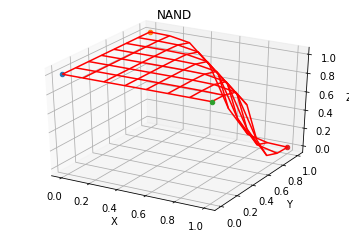

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([0], [0], [1])
ax.scatter([0], [1], [1])
ax.scatter([1], [0], [1])
ax.scatter([1], [1], [0])

ax.plot_wireframe(mesh_X, mesh_Y, y_hat,color ="r")
print(mesh_X.shape)
print(mesh_Y.shape)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("NAND")

plt.show()